### 문제정의
- 타이타닉 데이터를 활용하여 생존과 사망을 구분하는 머신러닝 모델 만들자

### 데이터 수집
- kaggle 사이트에서 데이터 다운로드

In [1]:
# train 변수 : 문제 가져오기
# test 변수 : 정답 가져오기

import pandas as pd
train = pd.read_csv('./data/titanic/train.csv')
test = pd.read_csv('./data/titanic/test.csv')

In [2]:
print(train.shape) # 891개의 데이터, 12개의 특성
print(test.shape) # 418개의 데이터, 11개의 특성, Survived 컬럼이 없다 ==> "규칙을 통해 예측할 내용."

(891, 12)
(418, 11)


### 데이터 전처리
- 결측치 & 이상치 확인

#### 결측치 확인
- info()

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 결측치 컬럼
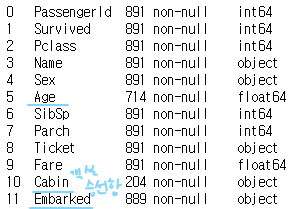
<br>
+ 머신러닝 학습을 위해 Object -> 숫자형 자료로 변경 컬럼:  
Name, Sex, Ticket, Cabin, Embarked

In [4]:
# (Test 데이터)

test.info()
# 결측치 컬럼 : Age, Fare, Cabin
# 숫자형 자료로 (타입)변경 컬럼 : Name, Sex, Ticket, Cabin, Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### 이상치 확인
- describe() 사용

In [5]:
train.describe()
# Fare : 평균이 어느정도 의미 있다.
#        평균과 중앙값을 비교했을때 평균>중앙값 라는 것은?
#        1. 티켓의 가격이 잘못 
#        2. 데이터 수집이 잘못
#        3. 진짜 1등급을 넘어서는 가격이 존재
# PassengerId = 승객의 번호. 필요없는 데이터임   -- 컬럼 삭제할 예정
# Survived(0,1) : 38% 생존한 의미
# Pclass(1, 2, 3) : 객실 등급, 평균이라는 의미 X
# Age : 평균값이 의미 0, 20 ~ 30대 승객이 많응
# SibSp : 형제자매수, 배우자 수 -> 이상치 의미X
# Parch : 부모, 자식의 수 - >이상치 의미X

# 크게 이상치가 있다고 볼 수 없다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Embarked 결측치 채우기

In [6]:
# 데이터의 중복을 제거하고 데이터의 종류 확인, 데이터당 갯수의 분포를 확인
# train['Embarked'] = 889의 승선항 알파벳이 좌라락

# 해당 컬럼의 데이터 갯수를 세어주는 함수 : value_counts()
train['Embarked'].value_counts()

# 결측치를 채울때 주의할 점
# - 어떤 이유로 값을 채울 것인가 확인
# 탑승하는 항구의 값을 채우기 위해 다른 컬럼이나 추가적인 정보 확인이 필요
# 탑승하는 항구별로 티켓의 가격이 다른지 확인하는 게 의미가 있을 수 있음 

# 💛 '결측치가 2개이므로 전체적인 흐름에 영향을 주지는 않을 것 같다'

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
# 결측치 2개 (891 -> 889) 를 최빈값 (='S'값)==> 대표값으로 채우기 ❕
# 전체 결측치를 한번에 채워주는 함수 : fillna(입력값)
train['Embarked'].fillna('S', inplace=True) # 변경된 값을 저장

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Fare 결측치 채우기

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
# Embarked 결측치는 그 컬럼의 최빈값으로 채웠지만 (최빈=대표값)
# Fare 은 연속적 숫자 값으로, 최빈값이 있더라도 큰 의미는 없을 것 같음

# 중앙값을 사용해서 결측치를 채워보자
test['Fare'].fillna(14.454200, inplace=True)  # 중앙값으로 변경하고 저장

#### Age, Cabin 결측치 채우기
- Age, Cabin 은 결측치가 많기 때문에 다른 방법으로 결측치를 채워야 함

#### Age 결측치 채우기
- 다른 컬럼들과의 '상관관계'를 사용해서 결측치를 채우기

In [11]:
# 상관관계를 쉽게 보여주는 함수 = corr() 
train.corr()
# -1 ~ 1 사이의 숫자로 표현

# "-1" 에 가까울 수록 반비례 : 나이가 많을 수록, 객실 등급이 높아진다.
# "1" 에 가까울 수록 정비례(비례)

# 수치 앞의 부호로 정비례, 반비례를 판단하고, 
# 숫자의 절대값이 1에 가까울 수록 좋음.

# 형제자매/배우자, 객실등급은 나이와 상관이 있을 것이다~ 라고 유추가 된다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [12]:
# Age 컬럼을 Pclass 컬럼과 비교해서 결측치 채우기
#train[['Pclass','Age']] = train 데이터에서 Pclass 와 Age 컬럼이 좌라락 

train[['Pclass','Age']].groupby(by='Pclass').median()
# = 각 Pclass 에 따른 age 값의 중앙값
# Pclass = 1, 2, 3 : 숫자이지만 등급을 나타내는 범주형 자료


,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [13]:
# Age 컬럼을 Pclass, Sex 컬럼과 비교해서 결측치 채우기

age_table = train[['Pclass', 'Sex', 'Age']].groupby(by=['Pclass', 'Sex']).median()
age_table

Age
Pclass Sex         
1      female  35.0
       male    40.0
2      female  28.0
       male    30.0
3      female  21.5
       male    25.0

In [14]:
train.iloc[5] # 승객 한명의 정보 (행)

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object

In [15]:
# 하나의 행을 가지고 와서
# Age가 결측치가 아니면 --> 원래 가지고 있던 값을 그대로 사용
# Age가 결측치라면 Pclass, Sex를 확인하고 해당하는 값을 age_table 검색 후 
# 해당 값으로 'Age'결측치 채우기 ❕

# 꺼내오는 하나의 행 정보가 넘파이-배열 의 형태임 -> 넘파이 import
import numpy as np

# isnan - 결측치 면
def fill_age(person) :
    if np.isnan(person['Age']) : # 꺼내온 정보에서 Age 컬럼이 결측치
                                # 두개의 컬럼을 가져오기
        return age_table.loc[person['Pclass'], person['Sex']]['Age']
    else : # Age 컬럼이 결측치가 아님
        return person['Age']

In [16]:
# 행과 열단위의 계산을 진행 ==> 행, 열 단위의 데이터를 사용 : apply()
# train-891개, test = 418개 데이터

In [17]:
# apply() : 행과 열단위로 복잡한 계산을 할 때 사용
train.apply(fill_age, axis = 1) # 행단위로 출력

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.5
889    26.0
890    32.0
Length: 891, dtype: float64

In [18]:
# 결측치가 채워진 Age 컬럼 출력
train['Age'] = train.apply(fill_age, axis=1)
test['Age'] = train.apply(fill_age, axis=1)

In [19]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.5
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Cabin 결측치 채우기

In [21]:
train['Cabin'].unique()  # 안겹치게 값 가져오기
# 앞의 알파벳 : 타이타닉 호의 구역
# 뒤 숫자 : 방번호
# 너무 데이터의 종류가 많아서 규칙을 만들기에 부적합
# 앞의 알파벳만 사용해서 공통특성으로 그룹화할 것

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [22]:
train['Cabin'].str[0]   # 문자열 인덱싱으로 맨 앞 알파벳만 가져오기
train['Cabin'] = train['Cabin'].str[0]
test['Cabin'] = train['Cabin'].str[0]

In [23]:
train['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [24]:
# 각각의 알파벳에 해당하는 데이터 갯수를 확인해주는 함수
train['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [25]:
# 결측치가 가장 많은 컬럼
# 결측치들을 하나의 데이터로 가정
#              -> 결측치가 사망자의 데이터. 데이터를 받지 못해 많은 것

# 'N'이라고 지정할 것
train['Cabin'].fillna('N', inplace=True)
test['Cabin'].fillna('N', inplace=True)

In [26]:
train['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### PassengerId 삭제
- 승객의 탑승번호는 생존과 연관이 없으므로 필요없는 데이터이다.

In [29]:
# 행이나 열 단위로 데이터삭제 : drop()
train.drop('PassengerId', axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)

In [30]:
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


In [31]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,22.0,0,0,330911,7.8292,N,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,38.0,1,0,363272,7.0000,C,S
2,2,"Myles, Mr. Thomas Francis",male,26.0,0,0,240276,9.6875,N,Q
3,3,"Wirz, Mr. Albert",male,35.0,0,0,315154,8.6625,C,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,35.0,1,1,3101298,12.2875,N,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,N,S
414,1,"Oliva y Ocana, Dona. Fermina",female,44.0,0,0,PC 17758,108.9000,N,C
415,3,"Saether, Mr. Simon Sivertsen",male,21.5,0,0,SOTON/O.Q. 3101262,7.2500,N,S
416,3,"Ware, Mr. Frederick",male,34.0,0,0,359309,8.0500,N,S


#### Text 데이터 전처리
- Name, Ticket

##### Name
- 이름데이터의 공통점 : 이름과 성 사이 호칭이 존재
- 이름이라는 글자자체는 중요하지 않다. --> 호칭으로 그룹화 한 것들을 숫자로 바꿈

In [32]:
# 목표 = Mr 꺼내오기
train['Name'].iloc[0]

# 중간에 있는 호칭만 사용하기
# train['Name'].iloc[0].split(',')[1] => ' Mr. Owen Harris'
train['Name'].iloc[0].split(',')[1].split('.')[0].strip() 

# 공백 제거 strip()

'Mr'

In [33]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [34]:
# 중간 호칭을 가져오는 함수 만들기

def split_name(name) :
    return name.split(',')[1].split('.')[0].strip()

In [35]:
# apply() 함수 적용, 하나의 행씩 처리 할 것 
train['Name'] = train['Name'].apply(split_name)
test['Name'] = test['Name'].apply(split_name)

In [36]:
test['Name'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Name, dtype: int64

In [37]:
# 가지수가 별로 없는 데이터는 사용하지 않는 게 좋음 ==> 과대 적합을 피하기 위해
# 사용하지 않거나, 다른 데이터 대체 (other)
train['Name'].value_counts()
convert_title_dic = {
    'Mr' : 'Mr',             
    'Miss' : 'Miss',
    'Mrs' : 'Mrs',
    'Master' : 'Master',         
    'Dr' : 'Dr',             
    'Rev' : 'Rev',            
    'Mlle' : 'Other',             
    'Major' : 'Other',            
    'Col' : 'Other',              
    'the Countess' : 'Other',     
    'Capt' : 'Other',             
    'Ms' : 'Other',                
    'Sir' : 'Other',              
    'Lady' : 'Other',             
    'Mme' : 'Other',              
    'Don' : 'Other',              
    'Jonkheer' : 'Other',
    'Dona' : 'Other'}

In [38]:
# key 값을 value 값으로 대체해주는 함수 : map()
train['Name'] = train['Name'].map(convert_title_dic)
test['Name'] = test['Name'].map(convert_title_dic)

In [39]:
train['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev', 'Dr'], dtype=object)

In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     418 non-null    object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [42]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [43]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

#### Ticket

In [44]:
train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [45]:
len(train['Ticket'].unique())
# 891 -> 681
#다른 탑승객과 동일한 티켓이름을 가진 사람이 210명

681

In [46]:
# 공통점을 발견하는게 쉽지 않고, 예측을 하는데 별로 도움이 되지 않는 데이터 ==> 삭제 
train.drop('Ticket', axis = 1, inplace = True)
test.drop('Ticket', axis = 1, inplace = True)

In [47]:
print(train.shape)
print(test.shape)

(891, 10)
(418, 9)


### 탐색적 데이터 분석 (EDA)
- 통계치가 별 의미가 없으므로 데이터를 그래프로 확인

In [48]:
# 그래프를 그려주는 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns  # 그래프를 쉽게 그려주는 라이브러리

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     891 non-null    object 
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


#### 범주형 데이터 
- object 타입
- Name, Sex, Cabin, Embarked, Pclass
- bar 차트 사용
- Pclass : 정수형 데이터타입이지만, 연속된 숫자가 아닌 객실의 등급이므로 범주형으로 처리

In [50]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,Mr,male,22.0,1,0,7.2500,N,S
1,1,1,Mrs,female,38.0,1,0,71.2833,C,C
2,1,3,Miss,female,26.0,0,0,7.9250,N,S
3,1,1,Mrs,female,35.0,1,0,53.1000,C,S
4,0,3,Mr,male,35.0,0,0,8.0500,N,S


##### Cabin 시각화 

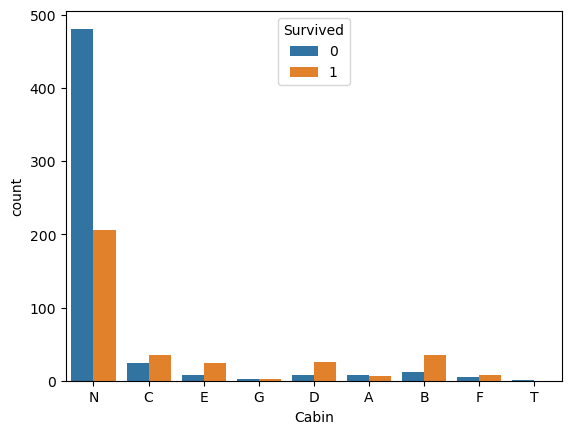

In [51]:
sns.countplot(data=train, x='Cabin', hue='Survived') # 두 개의 값 보여준다.
plt.show()

# 하나의 X축에 2개의 값이 존재
# countplot : 값의 갯수 , y
# x : 객실의 구역 - Cabin
# hue : x축에서 생존자/사망자의 count - Survived
# cabin의 결측치를 N이라는 값으로 채운게 어느정도 의미가 있는 것을 확인
# 데이터를 살펴보고 의미를 찾아가는 과정

- N의 값을 가지고 있는 사람들이 많이 죽었음.
- 임의로 채운 데이터이지만(N) 분석 활용에 괜찮을 거 같음.

##### Pclass 시각화

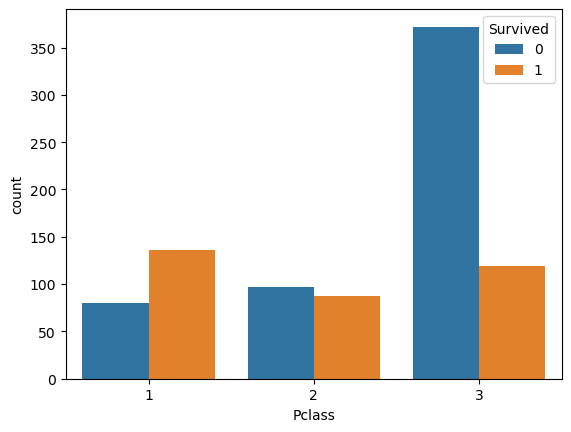

In [52]:
sns.countplot(data=train, x='Pclass', hue='Survived') # 두 개의 값 보여준다.
plt.show()

- 객실 등급이 높아질수록 생존율이 올라간다.

##### Cabin 과 Pclass 시각화

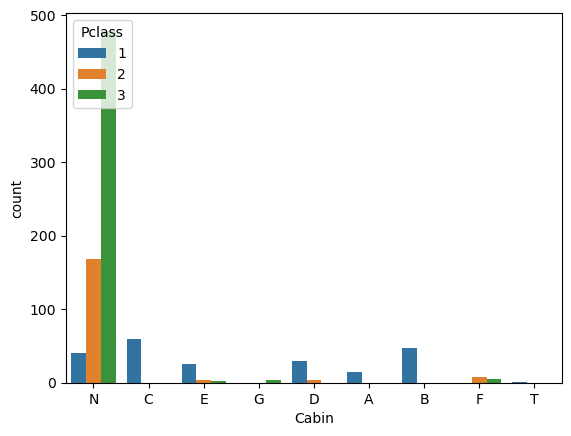

In [53]:
sns.countplot(data=train, x='Cabin', hue='Pclass') # Pclass로 카운팅
plt.show()

- N구역 사람들은 3등 객실에 사람들이 많았기 때문에 사망율도 높았다.
- A, B, C, D, E 구역은 1등 객실의 사람들이 많음  
==> 머신러닝을 위한 특성들을 정리하는 과정

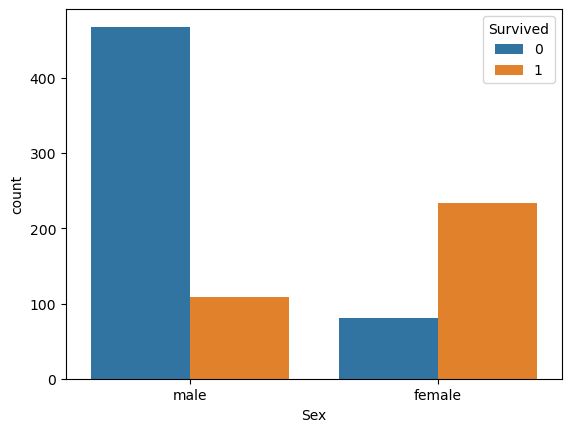

In [54]:
sns.countplot(data=train, x='Sex', hue='Survived') # Pclass로 카운팅
plt.show()

- 남성은 사망비율이 높다  
- 여성은 생존 비율이 높다

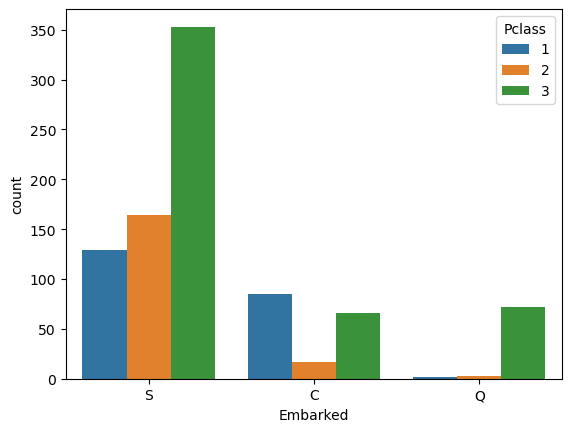

In [55]:
sns.countplot(data=train, x='Embarked', hue='Pclass') # Pclass로 카운팅
plt.show()

- Q라는 도시는 3등 객실의 탑승객이 많은 것을 보면 S,C에 비해 좀 낙후된 것 아닐까 하는 의문
- 각 탑승 항구에 따른 연관성 생각해 볼 필요가 있음

#### 숫자형 데이터
- 구간을 나눠서 데이터의 분포를 추정하는 그래프
- 히스토그램

##### Sex, Age, Survived 시각화

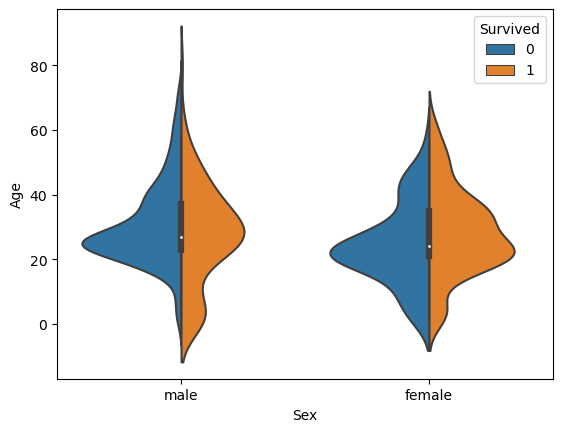

In [56]:
# 나이별 생존자와 서명자의 비율을 성별로 나타내준 그래프

sns.violinplot(data=train, x="Sex", y= 'Age', hue="Survived", split=True )
plt.show()



- 20, 40 대 사이가 많이 사망했고,
- 어린아이 중에서는 남자아이가 여자아이에 비해 많이 생존했다.

##### Sex, Fare, Survived 시각화

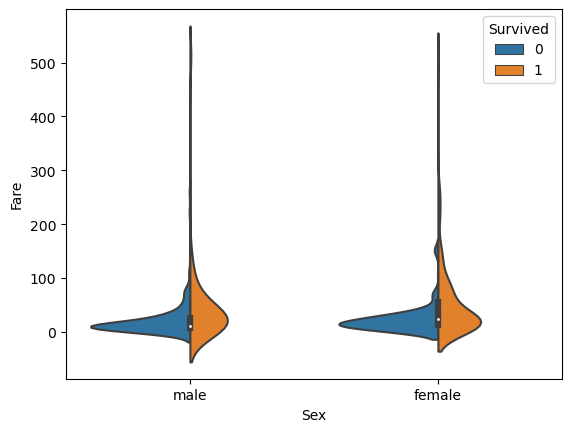

In [57]:
sns.violinplot(data=train, x="Sex", y= 'Fare', hue="Survived", split=True )
plt.show()

- 요금이 싼 사람은 상대적으로 많이 사망했다.

#### 특성 공학
- 특성공학 : 가지고 있는 특성을 기반으로 새로운 특성을 만드는 것
- SibSp + Parch을 더해서 가족의 숫자라는 새로운 컬럼을 생성 ==> 가족의 수 특성

In [58]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

##### 가족의  수 특성 만들기
- SibSp(형제자매수, 배우자수) + Parch(부모자식의 수) +1(본인) ==> Family_size(가족의 수)


In [59]:
train['Family_size'] = train['SibSp'] + train['Parch'] + 1

In [60]:
test['Family_size'] = test['SibSp'] + test['Parch'] + 1

In [61]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_size
0,0,3,Mr,male,22.0,1,0,7.2500,N,S,2
1,1,1,Mrs,female,38.0,1,0,71.2833,C,C,2
2,1,3,Miss,female,26.0,0,0,7.9250,N,S,1
3,1,1,Mrs,female,35.0,1,0,53.1000,C,S,2
4,0,3,Mr,male,35.0,0,0,8.0500,N,S,1


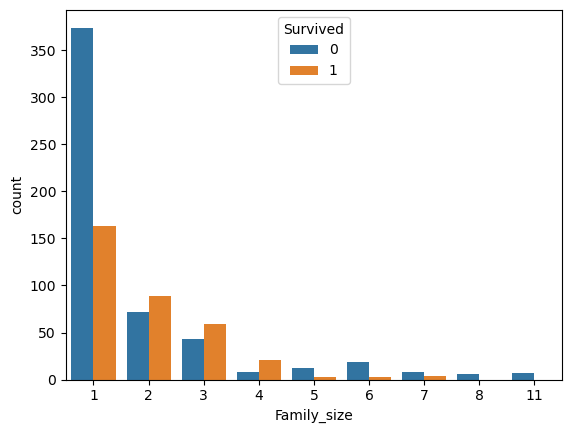

In [62]:
sns.countplot(data=train, x='Family_size', hue='Survived') # 두 개의 값 보여준다.
plt.show()

- 전체 데이터가 3개의 구간으로 나누어져 있음을 확인 -- Family_size
- 1 : 사망이 높은 비율 - Alone
- 2 ~ 4: 생존이 높은 비율 - Small
- 5 ~ 11 : 사망이 높은 비율 - Large
- 구간별로 수치형 데이터를 범주형으로 변경해주는 함수 ==>> Binning

In [63]:
# pd.cut()
# 필요한 정보
# 1. 구간에 대한 정보 : bins
# 2. 구간의 범주(라벨), 이름: labels

In [64]:
bins = [0, 1, 4, 11]   # 0초과 ~ 1 이하, 1초과 ~ 4 이하, 4초과 ~ 11이하 
labels = ['Alone', 'Small', 'Large']

In [65]:
train['Family_group'] = pd.cut(train['Family_size'], bins= bins, labels = labels)
test['Family_group'] = pd.cut(test['Family_size'], bins= bins, labels = labels)

In [66]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_size,Family_group
0,0,3,Mr,male,22.0,1,0,7.2500,N,S,2,Small
1,1,1,Mrs,female,38.0,1,0,71.2833,C,C,2,Small
2,1,3,Miss,female,26.0,0,0,7.9250,N,S,1,Alone
3,1,1,Mrs,female,35.0,1,0,53.1000,C,S,2,Small
4,0,3,Mr,male,35.0,0,0,8.0500,N,S,1,Alone


##### Family_group 시각화

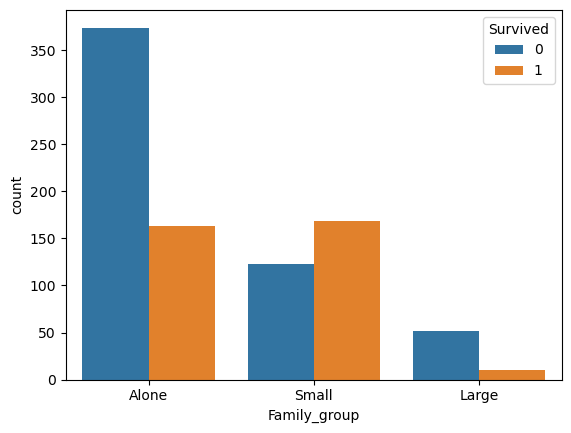

In [67]:
sns.countplot(data=train, x='Family_group', hue= 'Survived')
plt.show()

In [68]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_size,Family_group
0,0,3,Mr,male,22.0,1,0,7.2500,N,S,2,Small
1,1,1,Mrs,female,38.0,1,0,71.2833,C,C,2,Small
2,1,3,Miss,female,26.0,0,0,7.9250,N,S,1,Alone
3,1,1,Mrs,female,35.0,1,0,53.1000,C,S,2,Small
4,0,3,Mr,male,35.0,0,0,8.0500,N,S,1,Alone


#### 글자 데이터를 숫자 데이터로 변환
- 원 핫 인코딩을 사용

In [69]:
# 문자데이터 name , sex, cabin, embarked, family_group
# categorical feature
cat_feature = ['Name', 'Sex', 'Cabin', 'Embarked', 'Family_group']

In [70]:
# 가지고 있는 데이터는 train과 test로 나누어져 있음.
# 두 데이터가 다를 수 있음. ( Survived 컬럼 - train엔 있고, test엔 없다.)
# 원 핫 인코딩을 위한 train + test 합쳐서 수행 ==> 데이터가 다르면 오류

##### train에 있는 Survived 분리

In [71]:
# 훈련용 정답 만들기
y_train = train['Survived']

In [72]:
# train 데이터 세트에서 Survived 컬럼 삭제하기
train.drop('Survived', axis = 1, inplace = True)

In [73]:
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_size,Family_group
0,3,Mr,male,22.0,1,0,7.2500,N,S,2,Small
1,1,Mrs,female,38.0,1,0,71.2833,C,C,2,Small
2,3,Miss,female,26.0,0,0,7.9250,N,S,1,Alone
3,1,Mrs,female,35.0,1,0,53.1000,C,S,2,Small
4,3,Mr,male,35.0,0,0,8.0500,N,S,1,Alone


In [74]:
train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'Family_size', 'Family_group'],
      dtype='object')

In [75]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'Family_size', 'Family_group'],
      dtype='object')

In [76]:
# 두 개의 데이터(train, test) 세트를 합치기 (이제 똑같아진 컬럼수)
combined = pd.concat([train, test], ignore_index=True)
# 기본값 axis = 0 : 행 방향으로 train아래로 test 데이터행이 합해진다는 의미
# ignore_index 속성을 사용해서 하나의 인덱스 아래로 데이터를 모두 합칠 수 있다.
# concat은 기본적으로 아래(행)로 합쳐주는 함수, 인덱스 번호확인 필요
# ignore_index 속성 = 기존에 가지고 있던 인덱스 번호를 사용하지 않고,
# 새로운 인덱스 번호를 사용하겠다.

In [77]:
# One-hot 인코딩
# 컬럼안에 있는 데이터의 갯수만큼 컬럼을 생성
# train과 test를 합친 이유 : 만약 train과 test에 있는 
# 같은 컬럼의 값이 데이터의 양에 따라서 다를 경우
# - 원핫인코딩을 진행하면 컬럼의 갯수가 달라지게 됨.

In [78]:
one_hot = pd.get_dummies(combined[cat_feature])

In [79]:
one_hot.shape

(1309, 24)

### ㅍ